In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv") 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


***There are 1338 rows and tottle 7 columns are present***

***age and children columns have int64 data type***

***bmi and charges columns have float64 data type***

***sex, smoker and region have object data type***

In [7]:
for column in data.columns:
    unique_count = data[column].nunique()
    print("Column:", column, "Unique Value Count:", unique_count)

Column: age Unique Value Count: 47
Column: sex Unique Value Count: 2
Column: bmi Unique Value Count: 548
Column: children Unique Value Count: 6
Column: smoker Unique Value Count: 2
Column: region Unique Value Count: 4
Column: charges Unique Value Count: 1337


In [8]:
data.drop_duplicates(inplace=True)


In [9]:
data.shape

(1337, 7)

***I have dropped duplicate data. Earlier the data shape was 1338 and now it is 1337 which means one row has been deleted***

***Bacause there is categorical data in there columns[sex, smoker, region] so i used OrdinalEncoder***

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['sex', 'smoker', 'region']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
print(data.head())


   age  sex     bmi  children  smoker  region      charges
0   19  0.0  27.900         0     1.0     3.0  16884.92400
1   18  1.0  33.770         1     0.0     2.0   1725.55230
2   28  1.0  33.000         3     0.0     2.0   4449.46200
3   33  1.0  22.705         0     0.0     1.0  21984.47061
4   32  1.0  28.880         0     0.0     1.0   3866.85520


In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [12]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


***there is outlier present in bmi column because there is a lot of difference between 75% and max***

***skewness present in children column because there is a lot of difference between 50% and mean***

***No skewness in the age column becausse 50% and mean almost same***

***Remainder contains categorical data***

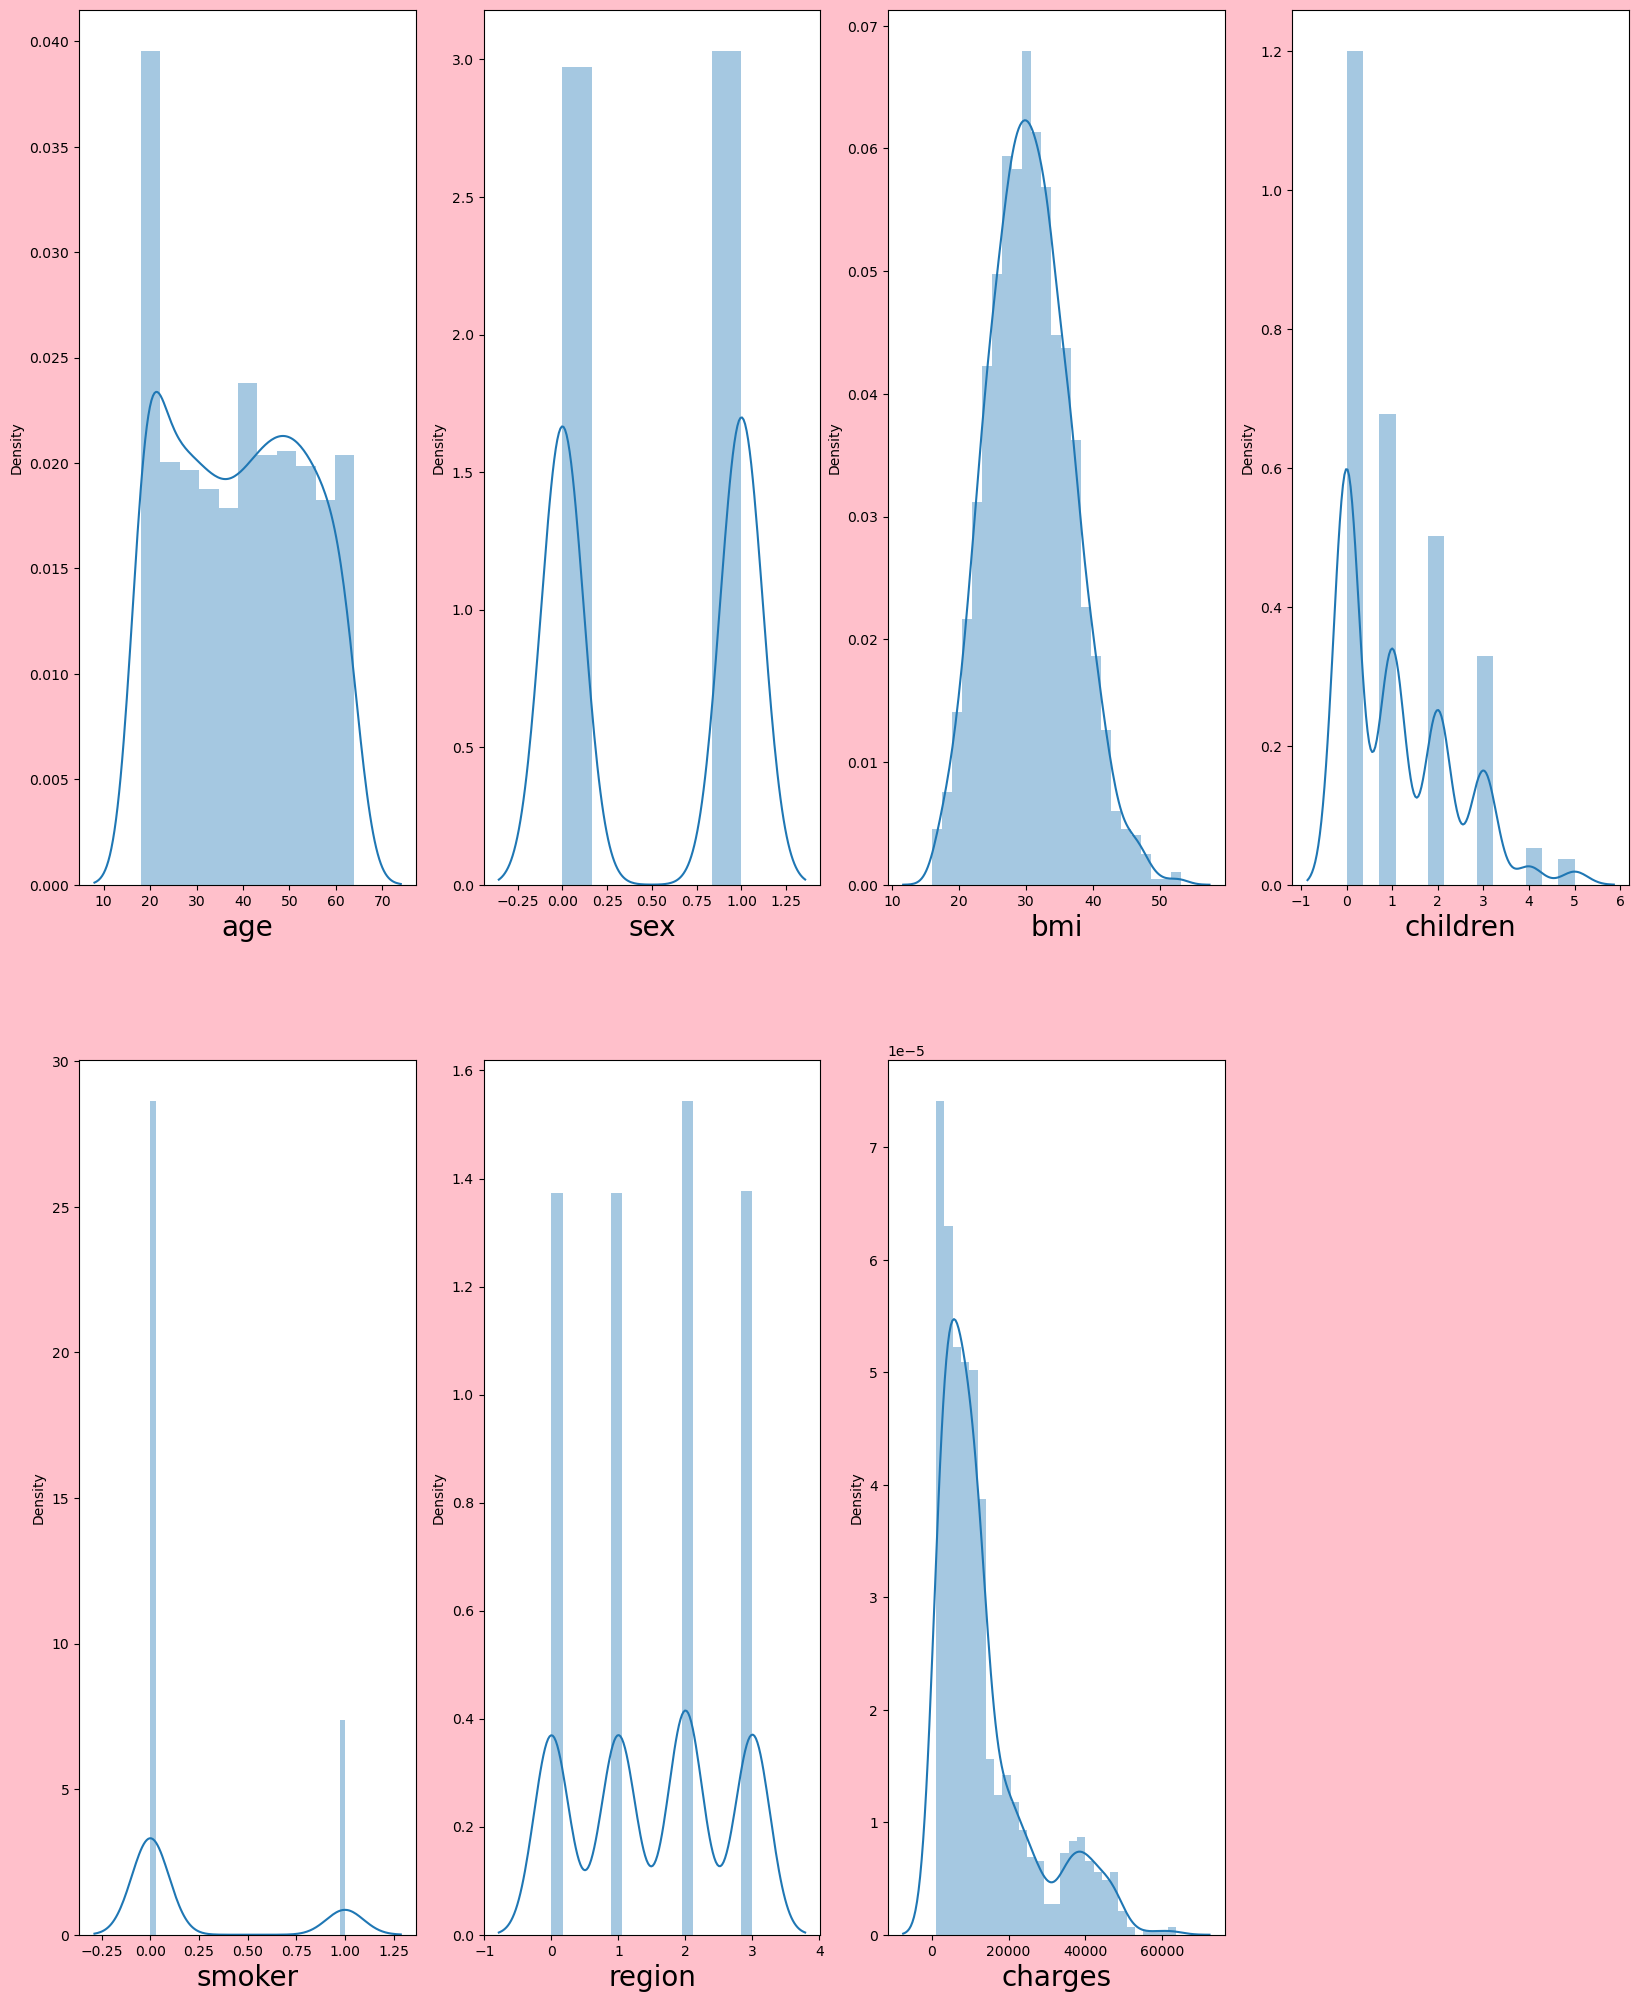

In [13]:
plt.figure(figsize=(20,25), facecolor='pink')
plotnumber= 1

for column in data:
    if plotnumber<=8:        
        ax = plt.subplot(2,4,plotnumber) 
        sns.distplot(data[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

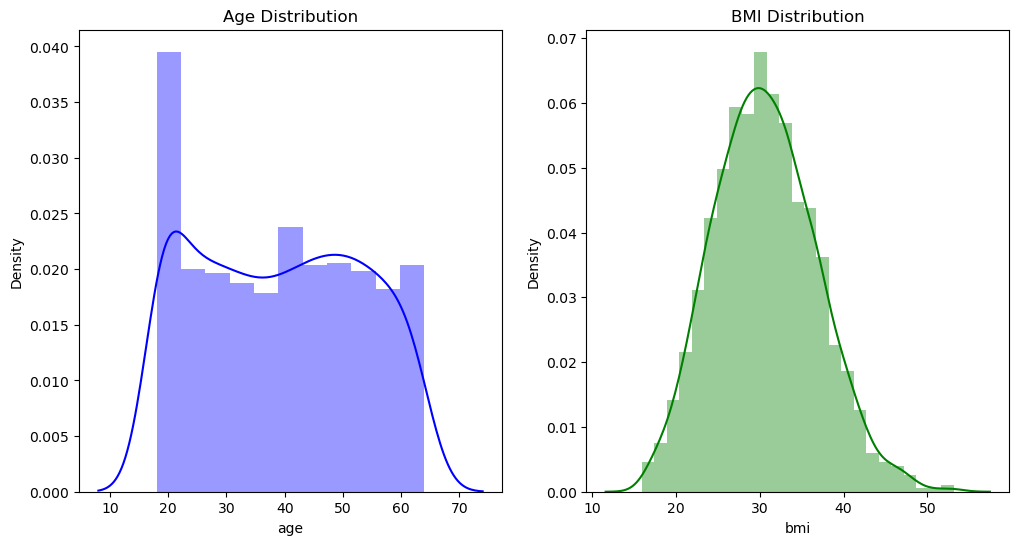

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.distplot(data['bmi'], kde=True, color='green')
plt.title('BMI Distribution')

plt.show()


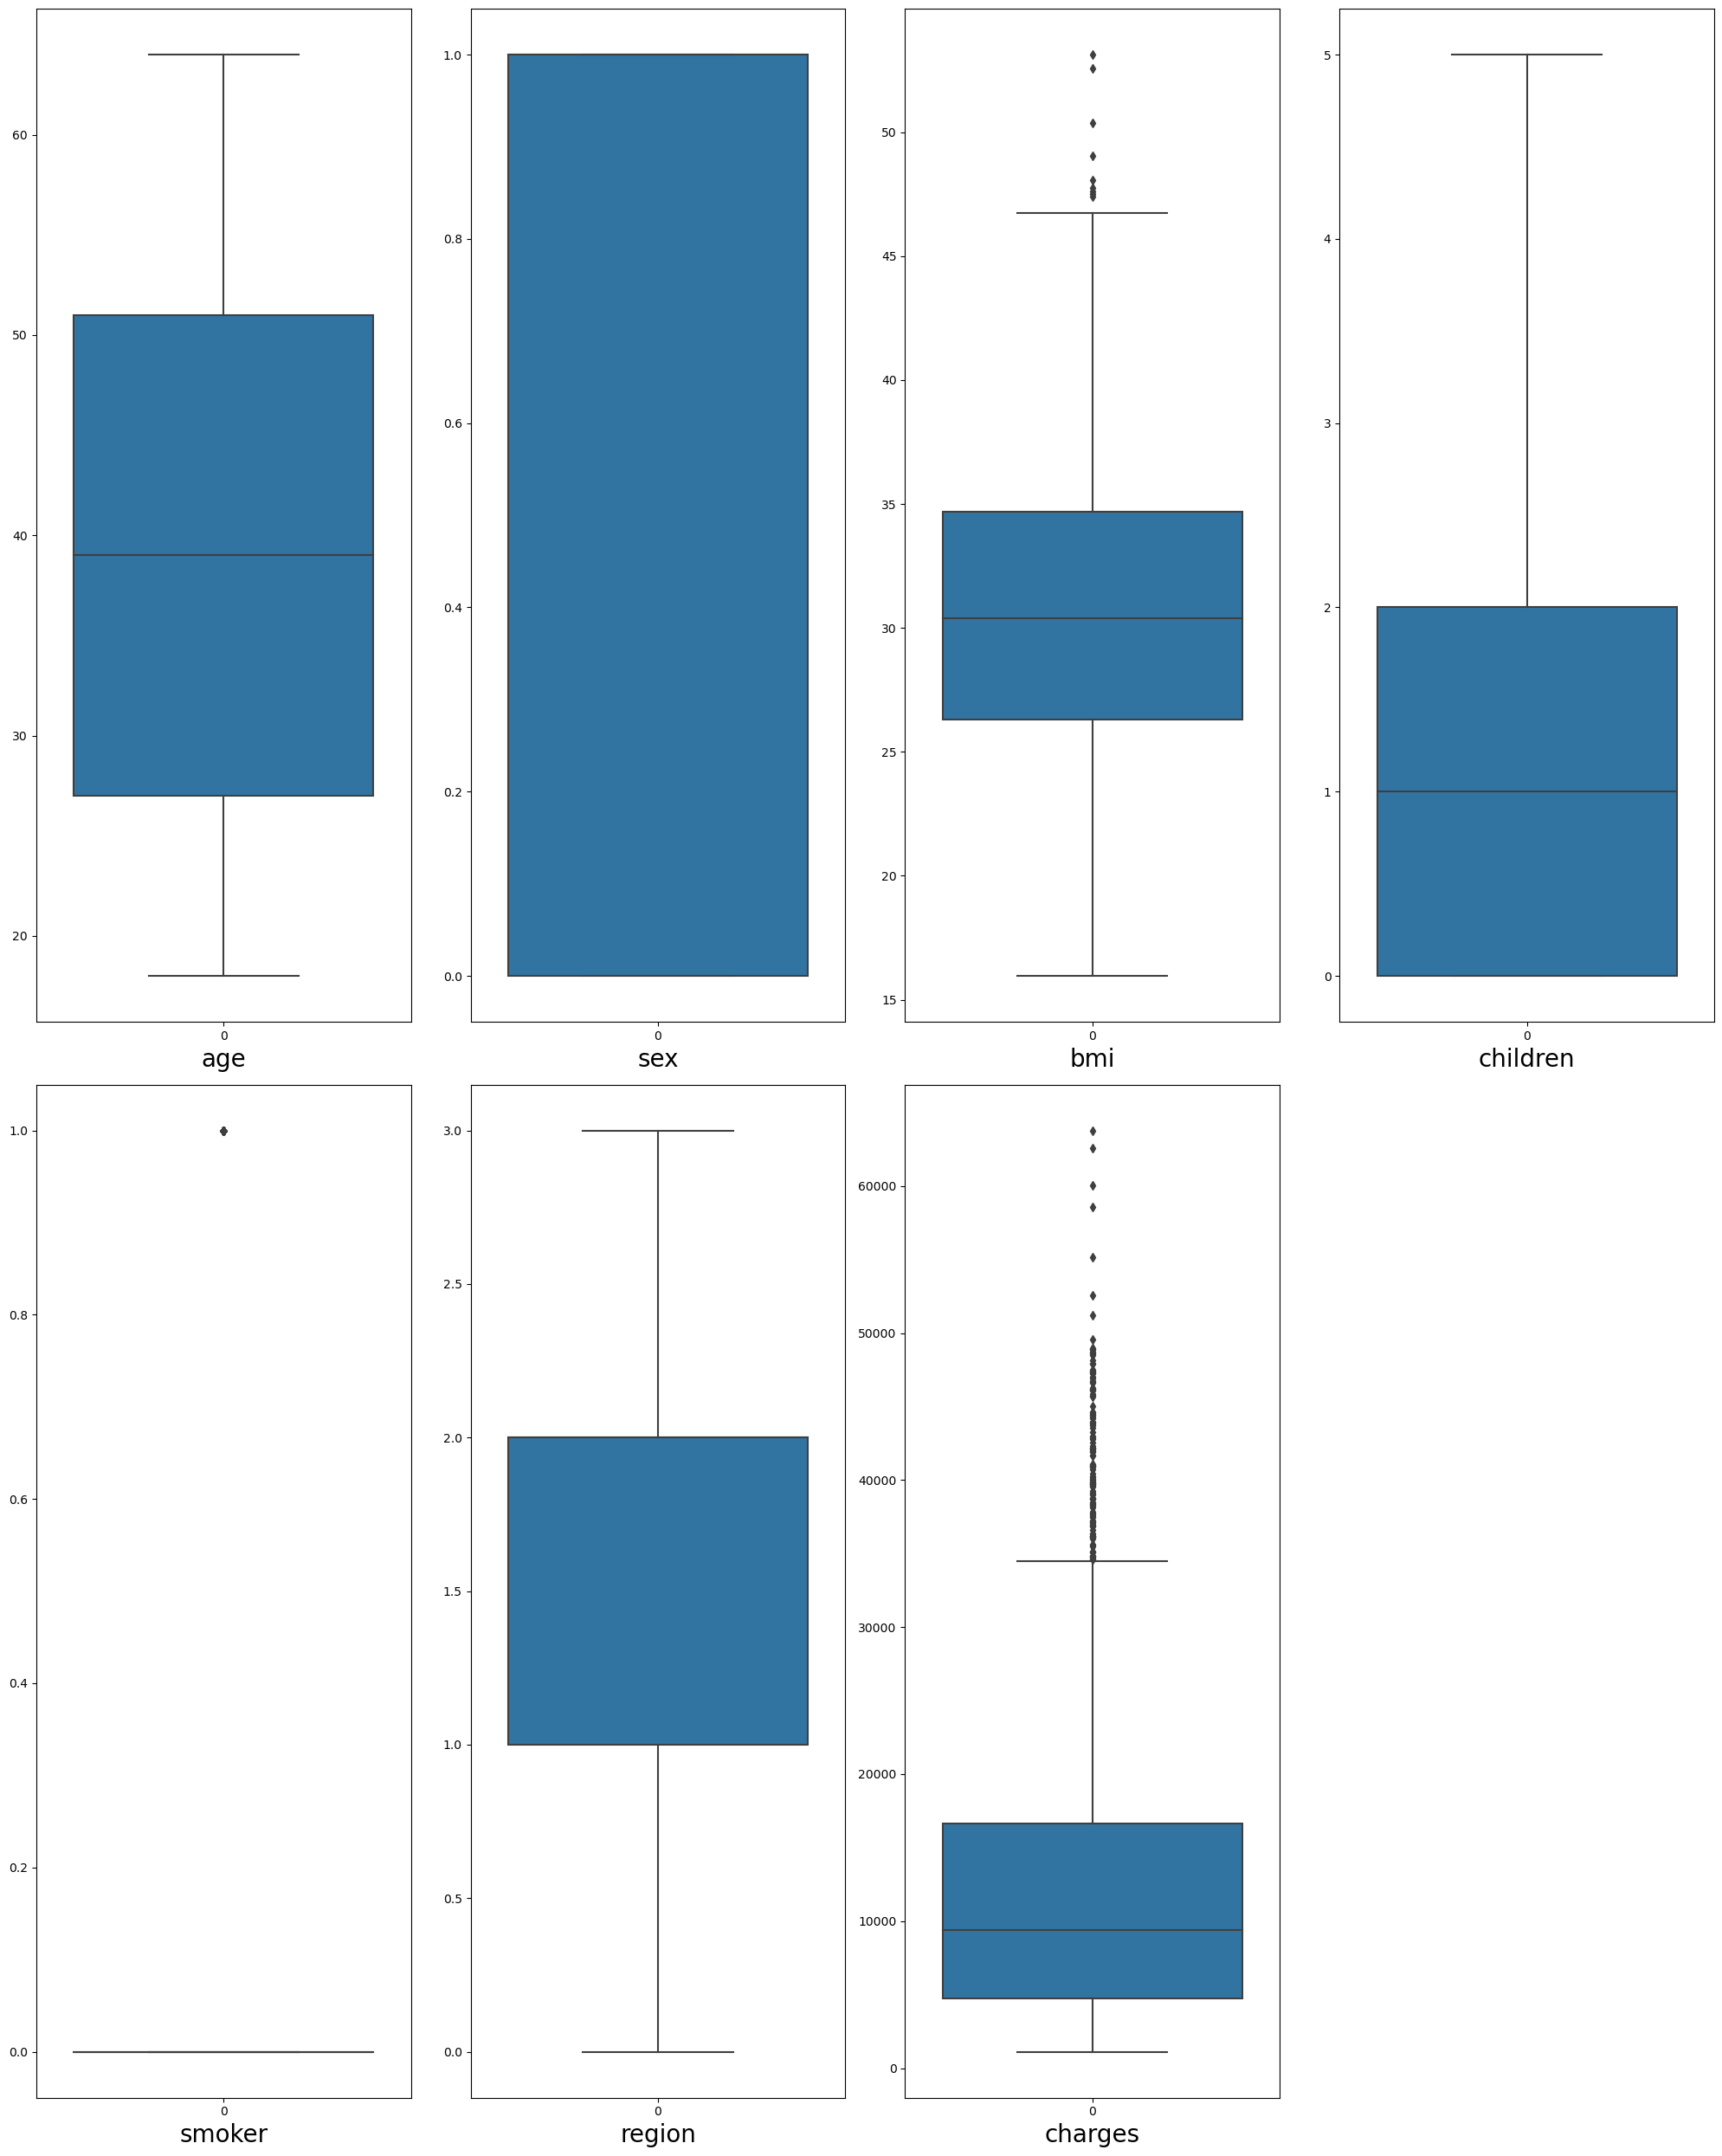

In [15]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 8:
        plt.subplot(2, 4, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1

plt.tight_layout()
plt.show()


###### there is higher side outlier present in bmi column
###### and lot of data imbalance problem in charges charges column

## Outlier detection

In [16]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

In [17]:
bmi_high = (q3['bmi'] + (1.5* iqr['bmi']))
print(bmi_high)

bmi_index= np.where(data['bmi']> bmi_high) 
print (bmi_index)

data = data.drop(data.index[bmi_index])
print (data.shape ) 

data.reset_index()

47.31500000000001
(array([ 116,  286,  401,  543,  846,  859, 1046, 1087, 1316], dtype=int64),)
(1328, 7)


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...,...
1323,1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1324,1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1325,1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1326,1336,21,0.0,25.800,0,0.0,3.0,2007.94500


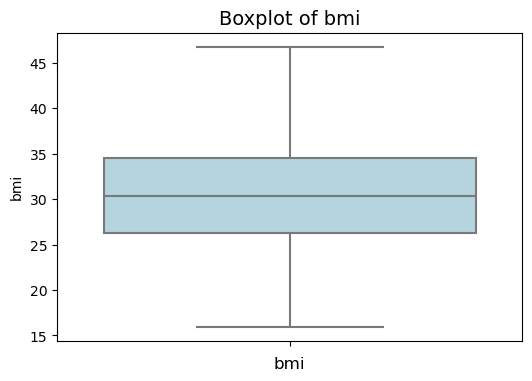

In [18]:

column_to_plot = data['bmi']

# Create a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=column_to_plot, color='lightblue')
plt.xlabel('bmi', fontsize=12)
plt.title('Boxplot of bmi', fontsize=14)
plt.show()


***So outlier were removed from bmi***

In [19]:
data.skew()

age         0.057521
sex        -0.015078
bmi         0.157141
children    0.935660
smoker      1.470251
region     -0.032620
charges     1.500088
dtype: float64

***Skewness present in children and smoker columns which is categorical data so we do not remove skewness from theas columns***


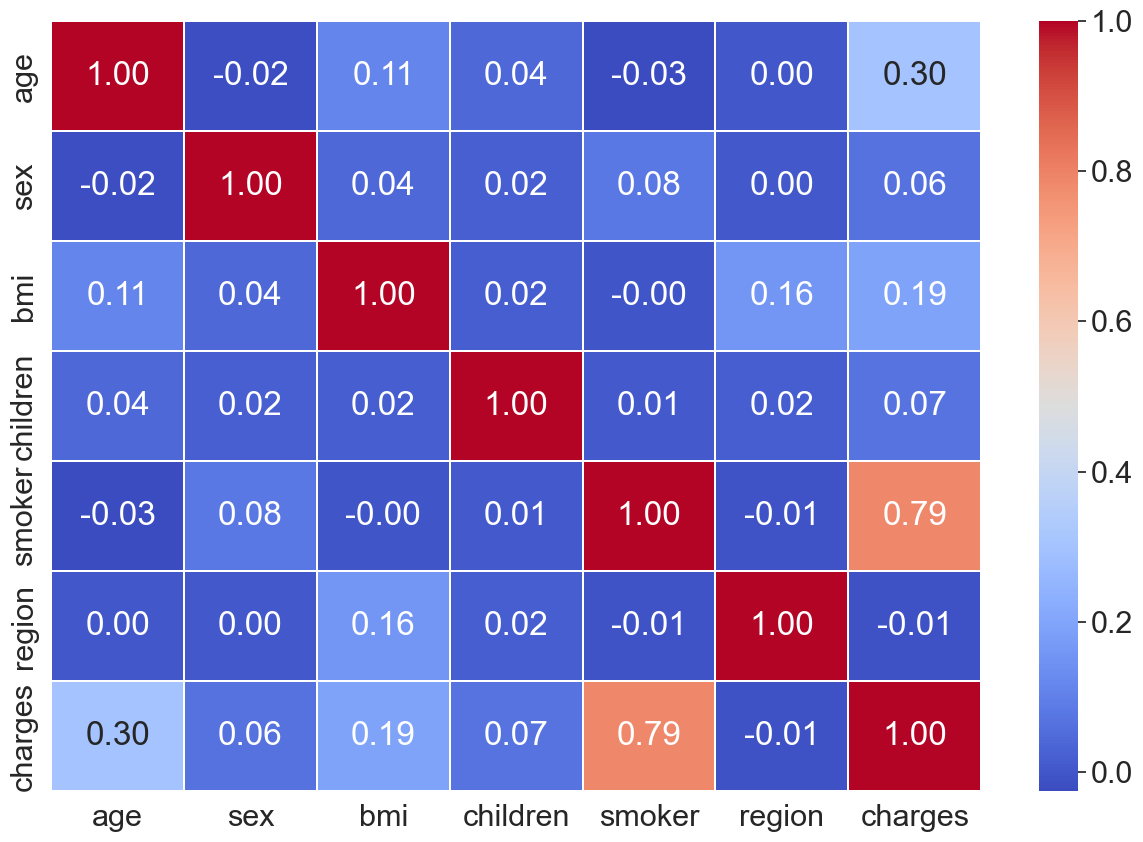

In [20]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 2)
sns.heatmap(data.corr(),linewidths=0.2,cmap='coolwarm', fmt=".2f", annot = True)
plt.show()

***strong correlation between smoker and charges which is 0.79, So it is important feature***

***region is low and negitive correlated with dependent variable and other are low and positive correlated with dependent variable***  

***I don't found multicollinearity issue there***

In [21]:
x = data.drop('charges',axis = 1)
y = data['charges']

### scaled the features

In [25]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

### Identify multicollinearity using vif

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
vif = pd.DataFrame()  

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    



vif

,vif,Features
0,1.016415,age
1,1.008965,sex
2,1.040798,bmi
3,1.002634,children
4,1.007135,smoker
5,1.025443,region


***No multicollinearity present in the features***

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

## Model bulding

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 9)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n============Train Result================")
        mse = mean_squared_error(y_train, y_pred)
        r2 = r2_score(y_train, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)

    elif not train:
        y_pred = clf.predict(x_test)
        print("\n============Test Result================")
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("Mean Squared Error : ",mse)
        print("R-squared (R2) Score : ",r2)


## AdaBoostRegressor

In [33]:
ada = AdaBoostRegressor()
#Model Training 
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [34]:
#Call the function and pass dataset to check train and test score 
metric_score(ada,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(ada,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  23263147.0052109
R-squared (R2) Score :  0.8371596291689664

============Test Result================
Mean Squared Error :  22570988.05519829
R-squared (R2) Score :  0.8461659935457769


## KNeighborsRegressor

In [35]:
# Initiate KNeighborsRegressor 
knn= KNeighborsRegressor()

#Model Training 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [36]:
#Call the function and pass dataset to check train and test score 
metric_score(knn,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(knn,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  18779212.3691492
R-squared (R2) Score :  0.8685468520049329

============Test Result================
Mean Squared Error :  25216079.131422456
R-squared (R2) Score :  0.8281382068712737


## LinearRegression 

In [37]:
# Initiate LinearRegression 
lin= LinearRegression()

#Model Training 
lin.fit(x_train, y_train)

LinearRegression()

In [38]:
#Call the function and pass dataset to check train and test score 
metric_score(lin,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(lin,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  36098543.776911356
R-squared (R2) Score :  0.7473127666787378

============Test Result================
Mean Squared Error :  35881541.859171696
R-squared (R2) Score :  0.7554470664530772


## DecisionTreeRegressor

In [39]:
# Initiate DecisionTreeRegressor 
dtr= DecisionTreeRegressor()

#Model Training 
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
#Call the function and pass dataset to check train and test score 
metric_score(dtr,x_train,x_test,y_train,y_test,train=True)         # This is for training score

metric_score(dtr,x_train,x_test,y_train, y_test,train=False)        # This is for testing score



============Train Result================
Mean Squared Error :  0.0
R-squared (R2) Score :  1.0

============Test Result================
Mean Squared Error :  42966657.40230329
R-squared (R2) Score :  0.7071580102750513


## cross-validation

In [41]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [42]:
lasso_regressor = LassoCV(alphas=None,max_iter=10)
lasso_regressor.fit(x_train, y_train)

LassoCV(max_iter=10)

In [43]:
#best alpha parameter
alpha = lasso_regressor.alpha_
alpha

9.259812181496548

In [44]:
#now we have best parameter, let,s use lasso regresssion and see 
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=9.259812181496548)

In [45]:
lasso_reg.score(x_test, y_test)

0.7555125712952815

***I will use AdaBoostRegressor model because its accuracy is better then other***

In [46]:
import pickle


In [47]:
pickle.dump(ada,open('Medi_Inc','wb'))

#### how to handel data imbalance problem in continuous data


#                                       End

## extra research

In [55]:
x.value_counts()

age  sex  bmi     children  smoker  region
18   0.0  38.280  0         0.0     2.0       2
          30.115  0         0.0     0.0       2
47   1.0  32.300  1         0.0     3.0       1
48   0.0  27.360  1         0.0     0.0       1
          27.265  1         0.0     0.0       1
                                             ..
31   0.0  26.620  0         0.0     2.0       1
          25.800  2         0.0     3.0       1
          25.740  0         0.0     2.0       1
          23.600  2         0.0     3.0       1
64   1.0  40.480  0         0.0     2.0       1
Length: 1326, dtype: int64

In [56]:
filtered_df = data[data['bmi'] < 18.5]
count = filtered_df.shape[0]

print("Count where BMI is < 18.5:", count)

Count where BMI is < 18.5: 20


In [61]:
filtered_df = data[data['bmi'] > 45]
count = filtered_df.shape[0]

print("Count where BMI is > 24.9:", count)

Count where BMI is > 24.9: 11


In [53]:
x_scaled[:11]

array([[-1.4404286 , -1.00755869, -0.44549526, -0.90856337,  1.97493519,
         1.34344665],
       [-1.51166949,  0.99249802,  0.5460678 , -0.08044247, -0.50634573,
         0.4396487 ],
       [-0.79926057,  0.99249802,  0.41599905,  1.57579935, -0.50634573,
         0.4396487 ],
       [-0.44305612,  0.99249802, -1.32303701, -0.90856337, -0.50634573,
        -0.46414925],
       [-0.51429701,  0.99249802, -0.27995321, -0.90856337, -0.50634573,
        -0.46414925],
       [-0.5855379 , -1.00755869, -0.81036343, -0.90856337, -0.50634573,
         0.4396487 ],
       [ 0.48307547, -1.00755869,  0.49032405, -0.08044247, -0.50634573,
         0.4396487 ],
       [-0.15809255, -1.00755869, -0.47252253,  1.57579935, -0.50634573,
        -0.46414925],
       [-0.15809255,  0.99249802, -0.11947878,  0.74767844, -0.50634573,
        -1.3679472 ],
       [ 1.48044795, -1.00755869, -0.79347139, -0.90856337, -0.50634573,
        -0.46414925],
       [-1.01298325,  0.99249802, -0.72928162, -0.

In [54]:
y[:11]

0     16884.92400
1      1725.55230
2      4449.46200
3     21984.47061
4      3866.85520
5      3756.62160
6      8240.58960
7      7281.50560
8      6406.41070
9     28923.13692
10     2721.32080
Name: charges, dtype: float64